# Bertand's Postulate

##### Within the range of n to 2n-2, where n >= 4, there will always be at least one prime number.



Goal:

- create a class that finds the primes of n to 2n-2

- used the first k findings to create a dataset, 
    where the features are whole number inputs 
    and the labels are number of primes from Bertrand's Postulate.

- create a model to predict quantity of of primes 

- train the model (make sure to use cross-validation)

- test the model

- evaluate (r-squared, mae, mse, rmse)

- visualize (scatter plot, histogram to showcase the quantity of primes in bins)

##### Import Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

##### Use seed to recreate the same results

In [3]:
np.random.seed(42)

##### Bertrand Function

In [4]:

def bertrand(n):
    results = []
    end = 2*n - 2
    for i in range(n+1, end):
        for j in range(2, i):
            if i % j == 0:
                break
        else:
            results.append(i)
    return results
                  


In [5]:
# (8), 9 , 10, 11, 12, 13, (14)
bertrand(8), len(bertrand(8))

([11, 13], 2)

In [6]:
[bertrand(i) for i in range(90,91)]

[[97,
  101,
  103,
  107,
  109,
  113,
  127,
  131,
  137,
  139,
  149,
  151,
  157,
  163,
  167,
  173]]

##### Save results to a dataframe

In [7]:
# m rows, 2 columns
# Bare mininum of 1K samples for ML. Avg problems are around 10K-100K. Complex problems need at 100K-1M
df = pd.DataFrame({'num': np.array([j for j in range(4,1004)]), 'length': np.array([len(bertrand(i)) for i in range(4, 1004)])})

df.head()

,num,length
0,4,1
1,5,1
2,6,1
3,7,1
4,8,2


##### Data Analysis

In [8]:
df.describe()

,num,length
count,1000.000000,1000.000000
mean,503.500000,72.689000
std,288.819436,37.864575
min,4.000000,1.000000
25%,253.750000,41.750000
50%,503.500000,73.000000
75%,753.250000,106.000000
max,1003.000000,136.000000


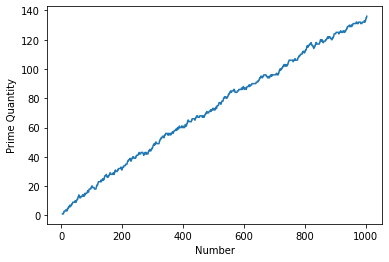

In [9]:
plt.plot(df['num'], df['length'])
plt.xlabel('Number')
plt.ylabel('Prime Quantity')
plt.show()

As n gets bigger, bertrands postulate shows a quantity of sums moving linearly upwards

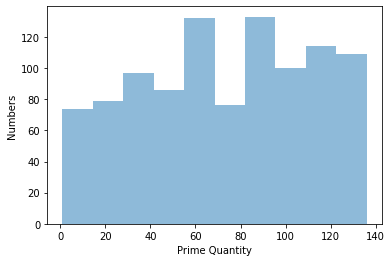

In [10]:
df['length'].plot.hist(bins=10, alpha=0.5)
plt.xlabel('Prime Quantity')
plt.ylabel('Numbers')
plt.show()

There are 136 numbers have a quantity of 60-70 and another that have 80-90 primes between Bertrand's Postulate

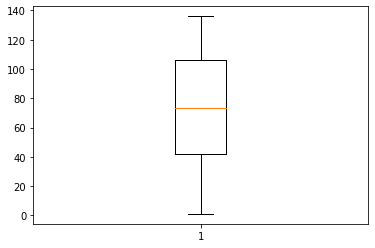

In [11]:
# box plot

plt.boxplot(df['length'])
plt.show()

We can see a maximum of 136, mininum of 1, an median around 70 (entire data), an median of around 100 for the upper quartile, and a median of around 40 for the lower quartile range. 

##### Data Preprocessing

In [12]:
df.dtypes # int32

# Scale Data 

#df['num'] = df['num'] / max(df['num'])
#df['length'] = df['length'] / max(df['length'])

# Shuffle data
df = shuffle(df)
df = df.reset_index(drop=True)
df.head()

,num,length
0,525,76
1,741,102
2,744,103
3,664,95
4,415,64


In [13]:
train_X, test_X, train_y, test_y = train_test_split(np.array(df['num']), np.array(df['length']) , train_size=0.8)

In [14]:
#train_X, test_X, train_y, test_y = train_test_split(df['num'], df['length'] , train_size=0.8)

In [15]:
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((800,), (800,), (200,), (200,))

In [16]:
train_X = train_X.reshape(-1,1)
#train_y = train_y.reshape(-1,1)
test_X = test_X.reshape(-1,1)
#test_y = test_y.reshape(-1, 1)

In [17]:
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((800, 1), (800,), (200, 1), (200,))

#### Linear Regression

In [18]:
# model 1

In [19]:
# Create Model
model = LinearRegression()


In [20]:
# Train model
model.fit(train_X, train_y)

LinearRegression()

In [21]:
model.score(test_X, test_y)

0.9966573693554841

In [22]:
test_y[:10]

array([ 38,  90,  99, 118,  67,  66,  18,   9,  91,  56])

In [23]:
model.predict(test_X)[:10]

array([ 35.8458784 ,  88.83149353, 100.99856071, 116.43634488,
        64.62818785,  63.18907238,  21.45472367,  12.03505875,
        90.66309504,  54.03106483])

In [24]:
predictions = model.predict(test_X)

In [25]:
model.coef_, model.intercept_

(array([0.13082868]), 6.801911580079832)

In [26]:
test_X.shape, test_y.shape

((200, 1), (200,))

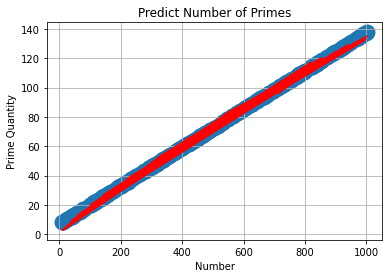

In [27]:
# y = mx + b
# y = model.coef_*test_X + model_intercept 
# x => test_X
#plt.scatter(test_y, predictions, c='red')
plt.plot(test_X, test_y, c='red')
plt.scatter(test_X, predictions, linewidths=10)
plt.grid()
plt.xlabel('Number')
plt.ylabel('Prime Quantity')
plt.title('Predict Number of Primes')
plt.show()

This graph is to show how our predictions match up with the true labels in terms of the values for the test set

In [28]:
print('MAE: {}'.format(metrics.mean_absolute_error(test_y, predictions)))
print('MSE: {}'.format(metrics.mean_squared_error(test_y, predictions)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(test_y, predictions))))
print('R2 {}'.format(metrics.r2_score(test_y, predictions)))

MAE: 1.732149447564282
MSE: 4.504709475038717
RMSE: 2.122430087196918
R2 0.9966573693554841


The goal with the error metrics are to lower them as much as possible. Therefore an error score of 0 is ideal, but not realistic. We can also see our r2 score almost reaches 100%

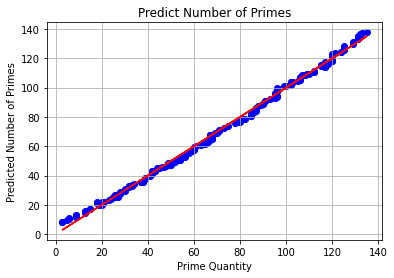

In [44]:
plt.scatter(test_y, predictions, c='b')
plt.plot(test_y, test_y, c='r')
#plot regression line
# y = mx + b
plt.ylabel('Predicted Number of Primes')
plt.xlabel('Prime Quantity')
plt.grid()
plt.title('Predict Number of Primes')
#plt.savefig('bertrand_primes.png', transparent=False, facecolor='gray')
plt.show()

This is another graph that show show how the predictions match up with the true labels 

##### model 2 - With Cross Validation
 

In [30]:
lr_model = LinearRegression()
#parameters = {'normalize':[True,False]}
parameters = {}
clf = GridSearchCV(lr_model, parameters, refit=True, cv=5)
best_model = clf.fit(train_X,train_y)

In [31]:
best_model.best_params_

{}

In [32]:
best_model.cv_results_

{'mean_fit_time': array([0.00159335]),
 'std_fit_time': array([0.0031867]),
 'mean_score_time': array([0.]),
 'std_score_time': array([0.]),
 'params': [{}],
 'split0_test_score': array([0.99655052]),
 'split1_test_score': array([0.99692914]),
 'split2_test_score': array([0.9962868]),
 'split3_test_score': array([0.9966195]),
 'split4_test_score': array([0.99724444]),
 'mean_test_score': array([0.99672608]),
 'std_test_score': array([0.00033018]),
 'rank_test_score': array([1])}

In [33]:
best_model.predict(test_X)[0:10]

array([ 35.8458784 ,  88.83149353, 100.99856071, 116.43634488,
        64.62818785,  63.18907238,  21.45472367,  12.03505875,
        90.66309504,  54.03106483])

In [34]:
test_y[:10]

array([ 38,  90,  99, 118,  67,  66,  18,   9,  91,  56])

In [35]:
best_model.score(test_X, test_y)

0.9966573693554841

In [36]:
predictions_best = best_model.predict(test_X)

In [37]:
import sklearn.metrics as metrics
print('MAE: {}'.format(metrics.mean_absolute_error(test_y, predictions_best)))
print('MSE: {}'.format(metrics.mean_squared_error(test_y, predictions_best)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(test_y, predictions_best))))
print('R2 {}'.format(metrics.r2_score(test_y, predictions)))

MAE: 1.732149447564282
MSE: 4.504709475038717
RMSE: 2.122430087196918
R2 0.9966573693554841


Our Scores are very similar to the scores without using cross validation. This is due to the fact the dataset and ML task are not complex in this situation. 

Text(0.5, 0, 'Y test')

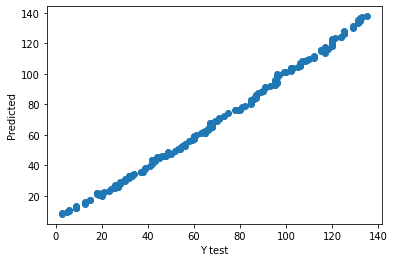

In [38]:
plt.scatter(test_y, predictions)
#plot regression line
# y = mx + b
plt.ylabel('Predicted')
plt.xlabel('Y test')

#### Conclusion

I have use regression to predict the number of primes given for any postive integer

1.) Instantiate/Create the Bertrand Library 

2.) Save the first n results to a DataFrame

3.) Analze data

4.) Preprocess data - Normalizing didn't have much of an impact because this is a simpler task with only one feature

5.) Instantiate Regresssion Model

6.) Train 

7.) Test 

8.) Evaluate

9.) Visualize

10.) Try with Cross Validation 